In [10]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Import data and save as a grouped csv, this step was only run once to group data, 
# some manual modifications were made on the grouped spreadsheet

dfList = []

topics_list = ['Urban, community and disaster', 'Health and psychological',
                     'Supply-chain', 'Environmental science and food', 'Energy and power-grid',
                     'Ecological, soil and animal']

file = open('data/meta-review_reading.xlsx', 'rb')
for topic_number in range (1, 7):
    for sorting in ['citation', 'newer']:
        dfTopic = pd.read_excel(file, sheet_name=f'{topic_number}-{sorting}', engine='openpyxl')
        dfTopic['topic'] = topics_list[topic_number-1]
        dfTopic['sorting'] = sorting
        dfList.append(dfTopic)

df = pd.concat(dfList, ignore_index=True)

# Cleaning data

## Replace False and True by numbers
df = df.replace(False, 0)
df = df.replace(True, 1)

df = df.replace('Compound indexes with mostly individual level components', 
                        'Compound indicator at individual level')
df = df.replace('Compound indexes with mostly system level components', 
                        'Compound indicator at system level')

df.to_excel('data/meta_review_grouped.xlsx')

/home/vitor/.local/lib/python3.6/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [12]:
# Rename columns
new_columns_name = ['paper_title', 'paper_DOI', 'reader', 'discipline', 'category', 'diversity-based',
                    'why_diversity', 'agency-based', 'metric_description', 'metric_name', 'metric_reference',
                    'other', 'topic', 'sorting']
new_columns = dict(zip(list(df.columns), new_columns_name))
df = df.rename(columns=new_columns)

In [13]:
# Print descriptive statistics of the dataset

print('Summary of the distribution of the number of metrics per paper:')
print(df.groupby('paper_DOI').size().describe())


# Percentage of metrics per category and topic
dfGroup = df.groupby(['topic', 'category']).size()
dfGroup = dfGroup.unstack()
dfGroup.loc['All topic models'] = dfGroup.sum(axis=0) / dfGroup.sum(axis=0).sum()
dfGroup = dfGroup.div(dfGroup.sum(axis=1), axis=0)

dfGroup

Summary of the distribution of the number of metrics per paper:
count    36.000000
mean      8.666667
std       6.511528
min       3.000000
25%       4.000000
50%       7.000000
75%      11.250000
max      32.000000
dtype: float64


category,Compound indicator at individual level,Compound indicator at system level,Early-warning signals,Performance under disruption,Shape of potential landscape,System Structure
topic,,,,,,
"Ecological, soil and animal",0.080000,0.020000,0.280000,0.500000,0.120000,NaN
Energy and power-grid,NaN,0.060000,NaN,0.900000,0.040000,NaN
Environmental science and food,0.133333,0.133333,0.566667,0.033333,NaN,0.133333
Health and psychological,0.960000,0.040000,NaN,NaN,NaN,NaN
Supply-chain,0.287671,0.041096,NaN,0.287671,0.082192,0.301370
"Urban, community and disaster",0.033898,0.355932,NaN,0.610169,NaN,NaN
All topic models,0.253205,0.108974,0.099359,0.410256,0.044872,0.083333


In [14]:
# Setting plot common variables

# Set font
plt.rc('font', size=20)

# Set category color palette
'''
Initial definition of the colors
#categories = df['category'].unique()
#cmap = matplotlib.cm.get_cmap('tab10')
#category_colors = dict([[categories[idx], cmap(idx)] for idx in range(len(categories))])
'''
category_colors = {
  'Performance under disruption': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
  'Compound indicator at system level': (1.0, 0.4980392156862745, 0.054901960784313725, 1.0),
  'Compound indicator at individual level': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0),
  'System Structure': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0),
  'Shape of potential landscape': (0.5803921568627451, 0.403921568627451, 0.7411764705882353, 1.0),
  'Early-warning signals': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0)
}

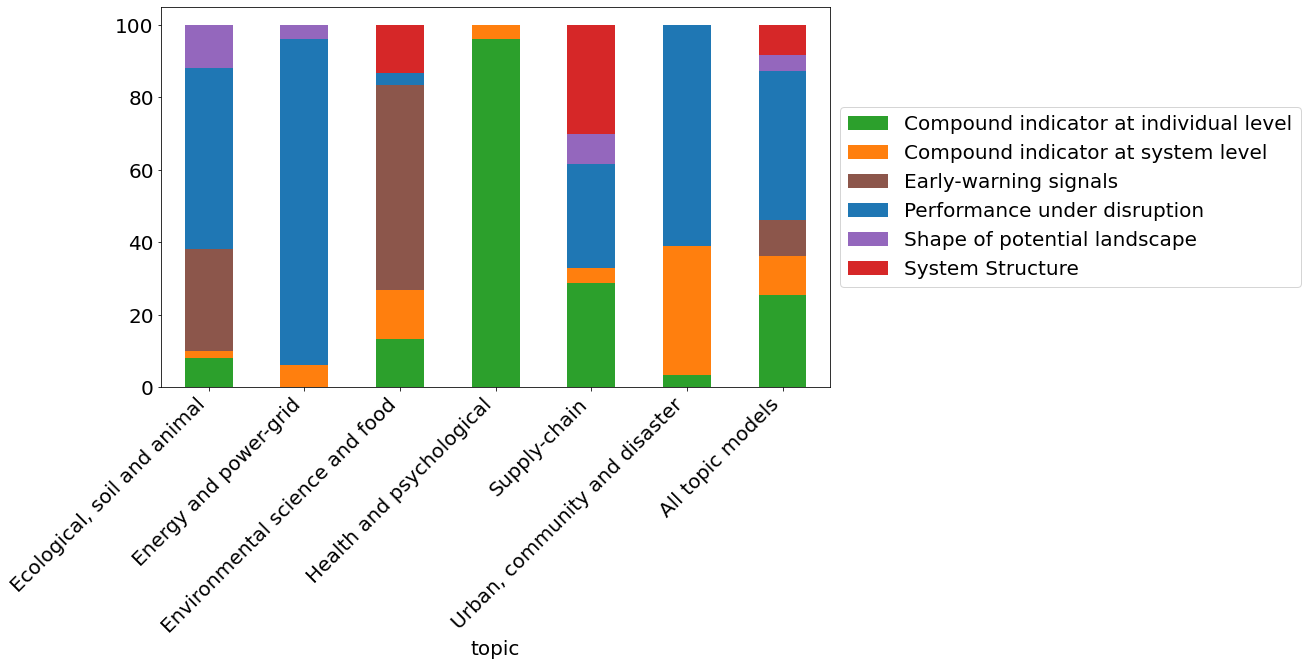

In [15]:
# Metric category per topic model

dfGroup = df.groupby(['topic', 'category']).size()
dfGroup = dfGroup.unstack()
dfGroup.loc['All topic models'] = dfGroup.sum(axis=0) / dfGroup.sum(axis=0).sum()
dfGroup = dfGroup.div(dfGroup.sum(axis=1), axis=0)
dfGroup *= 100

colors = [category_colors[cat] for cat in dfGroup.columns]
dfGroup.plot(kind='bar', stacked=True, figsize=(12, 7), color=colors)

plt.xticks(rotation=45, ha='right')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.title('Percentage of metric category per topic model')
plt.show()

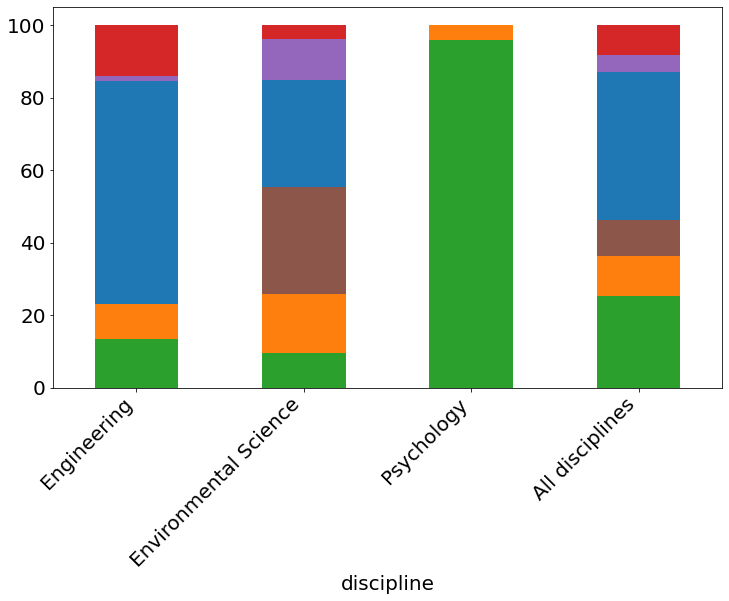

In [16]:
# Metric category per discipline (reduced discipline set)

dfSimplerDiscipline = df.replace(['Ecology', 'Development Studies'], 'Environmental Science')

dfGroup = dfSimplerDiscipline.groupby(['discipline', 'category']).size()
dfGroup = dfGroup.unstack()
dfGroup.loc['All disciplines'] = dfGroup.sum(axis=0) / dfGroup.sum(axis=0).sum()
dfGroup = dfGroup.div(dfGroup.sum(axis=1), axis=0)
dfGroup *= 100

colors = [category_colors[cat] for cat in dfGroup.columns]
dfGroup.plot(kind='bar', stacked=True, figsize=(12, 7), color=colors, legend=None)

plt.xticks(rotation=45, ha='right')
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.title('Percentage of metric category per topic model')
plt.show()

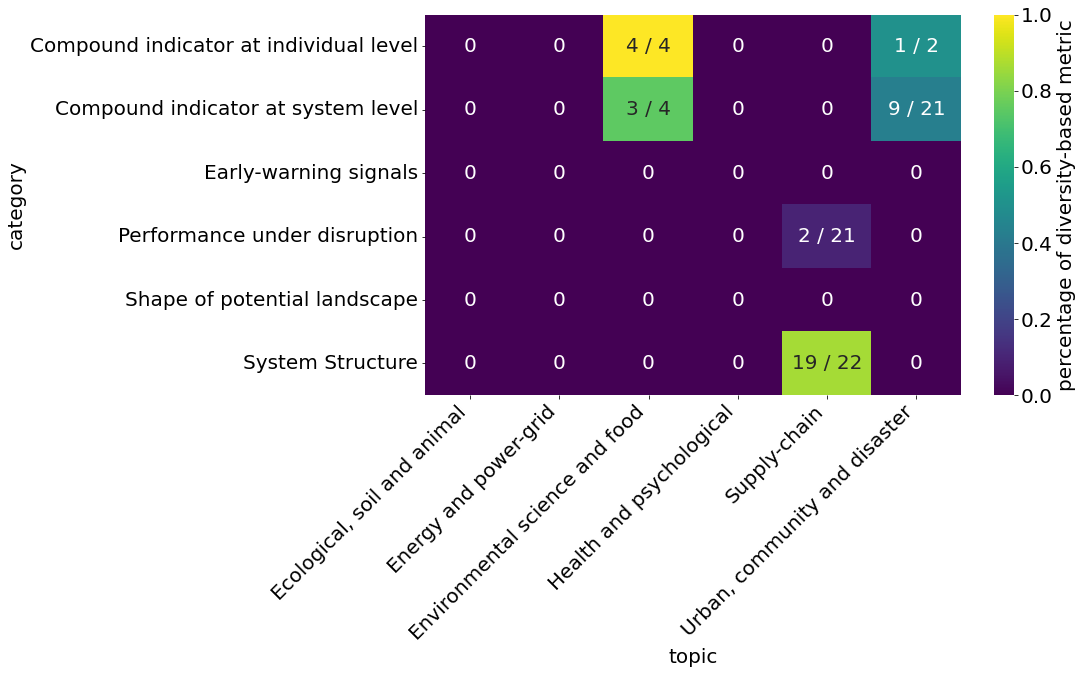

In [17]:
# Diversity-based metric per category and topic model

number_diversity = df[['topic', 'category', 'diversity-based']].groupby(['topic', 'category']).sum()
number_diversity = number_diversity['diversity-based'].map(int)
number_metric = df[['topic', 'category', 'diversity-based']].groupby(['topic', 'category']).count()
number_metric = number_metric['diversity-based']

annotate = number_diversity.map(str) + ' / ' + number_metric.map(str)
annotate[number_diversity==0] = '0'
annotate = annotate.unstack().T.fillna('0')

percentage = number_diversity / number_metric
percentage = percentage.unstack().T.fillna(0)

plt.figure(figsize=(12, 7))
label_cbar = 'percentage of diversity-based metric'
sns.heatmap(percentage, annot=annotate, fmt="", cbar_kws={'label': label_cbar}, cmap='viridis')
plt.xticks(rotation=45, ha='right')
#plt.title('Number of diversity-based metric per category and topic modelling\n')
plt.show()

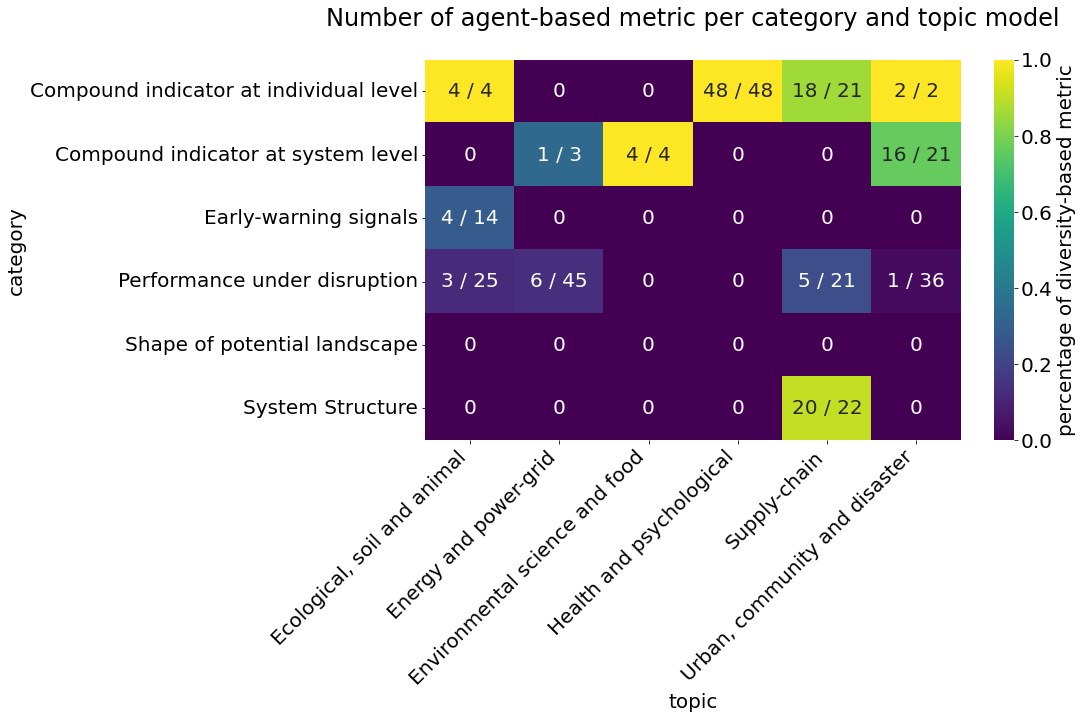

In [18]:
# Not used - Agency-based metric per category and topic model

number_diversity = df[['topic', 'category', 'agency-based']].groupby(['topic', 'category']).sum()
number_diversity = number_diversity['agency-based'].map(int)
number_metric = df[['topic', 'category', 'agency-based']].groupby(['topic', 'category']).count()
number_metric = number_metric['agency-based']

annotate = number_diversity.map(str) + ' / ' + number_metric.map(str)
annotate[number_diversity==0] = '0'
annotate = annotate.unstack().T.fillna('0')

percentage = number_diversity / number_metric
percentage = percentage.unstack().T.fillna(0)

plt.figure(figsize=(12, 7))
label_cbar = 'percentage of diversity-based metric'
sns.heatmap(percentage, annot=annotate, fmt="", cbar_kws={'label': label_cbar}, cmap='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Number of agent-based metric per category and topic model\n')
plt.show()